In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../../Data/house_price/cleaning/train_engineering.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLuasArea,UsiaRumah,TotalKamarMandi,AreaRatio
766,767,60,3,80.0,10421,1,3,3,0,4,...,500,3,2010,8,4,196500,2694,22,3,0.164476
526,527,20,3,70.0,13300,1,3,3,0,4,...,0,6,2007,8,4,132000,1856,51,1,0.069774
1234,1235,70,2,55.0,8525,1,3,0,0,4,...,0,11,2008,8,0,130000,2904,97,2,0.230381
1196,1197,60,3,58.0,14054,1,0,3,0,4,...,0,11,2006,6,5,219210,2742,0,3,0.132560
557,558,50,0,60.0,11040,1,3,2,0,4,...,0,9,2006,0,4,108000,1973,86,2,0.121014


DETECT OUTLIER

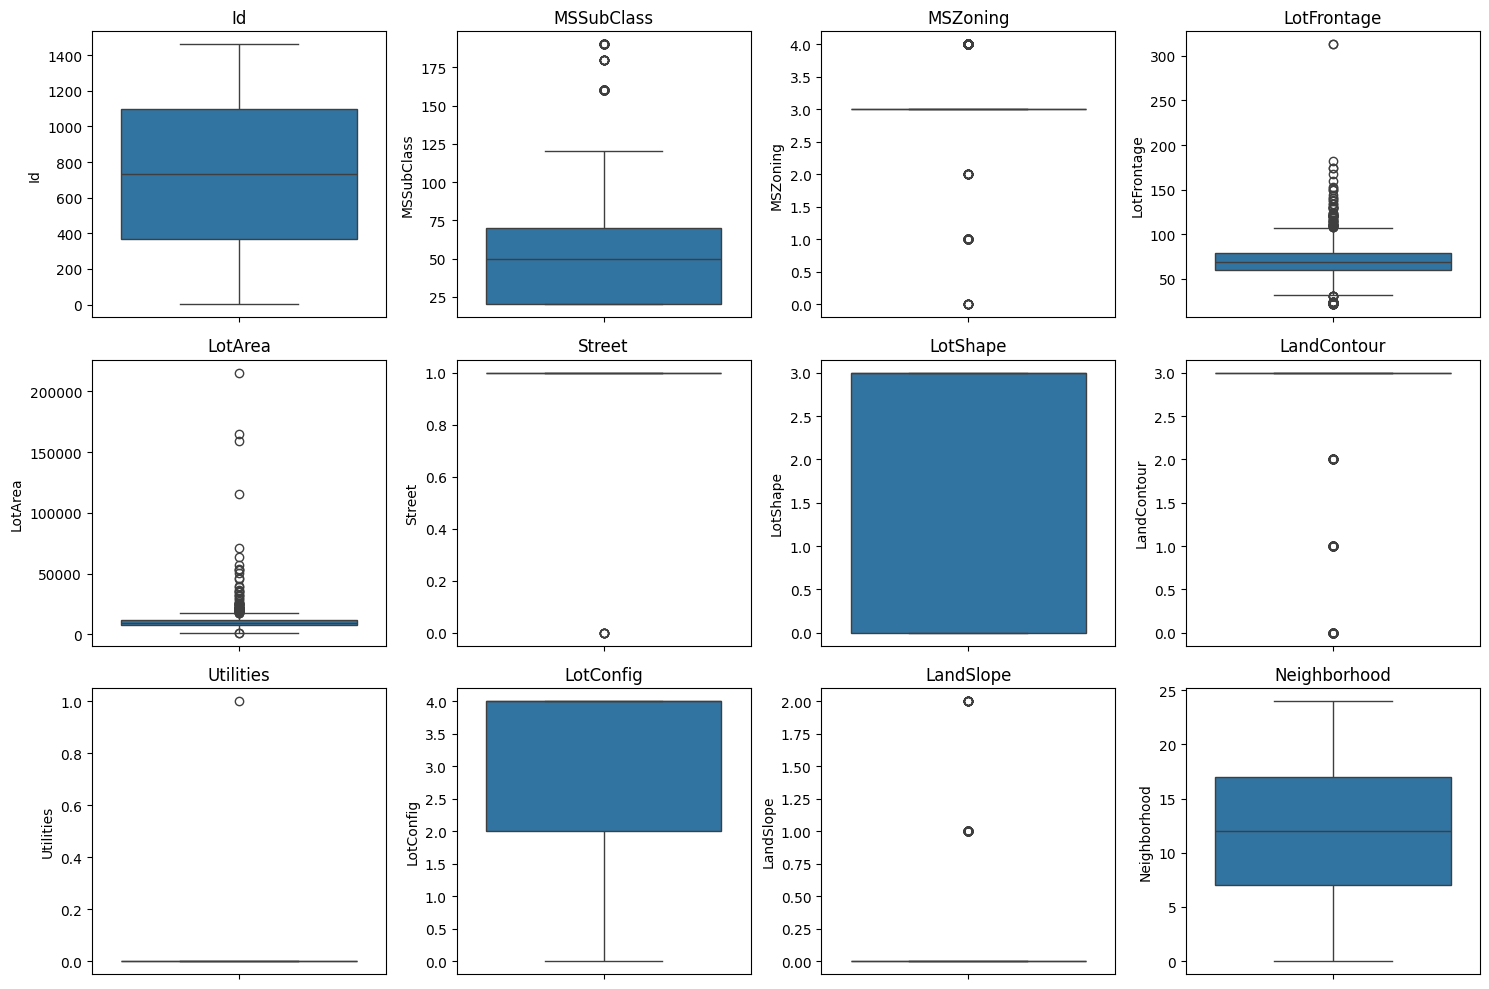

In [12]:
plt.figure(figsize=(15, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_cols[:12], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
# identify outlier
outliers_count = {}
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols[~numeric_cols.isin(['SalePrice'])]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_count[col] = len(outliers)

In [14]:
outliers_df = pd.DataFrame({
    'Jumlah Outlier': outliers_count,
})

outliers_df = outliers_df.sort_values(by='Jumlah Outlier', ascending=False)
outliers_df = outliers_df[outliers_df['Jumlah Outlier'] > 0]
outliers_df_percent = outliers_df / len(df) * 100

print("Kolom yang memiliki outlier:")   
outliers_df, outliers_df_percent

Kolom yang memiliki outlier:


(               Jumlah Outlier
 FireplaceQu               390
 RoofStyle                 319
 MSZoning                  309
 SaleCondition             262
 BldgType                  240
 ...                       ...
 2ndFlrSF                    2
 OverallQual                 2
 Utilities                   1
 BsmtFullBath                1
 GarageYrBlt                 1
 
 [66 rows x 1 columns],
                Jumlah Outlier
 FireplaceQu         26.712329
 RoofStyle           21.849315
 MSZoning            21.164384
 SaleCondition       17.945205
 BldgType            16.438356
 ...                       ...
 2ndFlrSF             0.136986
 OverallQual          0.136986
 Utilities            0.068493
 BsmtFullBath         0.068493
 GarageYrBlt          0.068493
 
 [66 rows x 1 columns])

In [15]:
# drop columns with outliers > 15%
drop_cols = outliers_df_percent[outliers_df_percent > 15].index.tolist()

for col in drop_cols:
    pct = outliers_df_percent.loc[col, 'Jumlah Outlier']
    print(f"- {col}: {pct:.2f}%")

df_cleaned = df.drop(columns=drop_cols) 

- FireplaceQu: 26.71%
- RoofStyle: 21.85%
- MSZoning: 21.16%
- SaleCondition: 17.95%
- BldgType: 16.44%
- BsmtExposure: 15.14%
- EnclosedPorch: 14.25%
- Condition1: 13.70%
- SaleType: 13.22%
- ExterCond: 12.19%
- BsmtFinSF2: 11.44%
- BsmtFinType2: 11.37%
- LandContour: 10.21%
- MasVnrType: 9.79%
- Electrical: 8.56%
- OverallCond: 8.56%
- BsmtQual: 8.29%
- PavedDrive: 8.22%
- ScreenPorch: 7.95%
- AreaRatio: 7.95%
- BsmtCond: 7.67%
- LotFrontage: 7.26%
- MSSubClass: 7.05%
- Functional: 6.85%
- KitchenQual: 6.85%
- MasVnrArea: 6.71%
- CentralAir: 6.51%
- BsmtHalfBath: 5.62%
- LandSlope: 5.34%
- OpenPorchSF: 5.27%
- LotArea: 4.73%
- GarageQual: 4.66%
- KitchenAbvGr: 4.66%
- TotalBsmtSF: 4.18%
- GarageCond: 3.63%
- MiscVal: 3.56%
- ExterQual: 3.56%
- BedroomAbvGr: 2.40%
- WoodDeckSF: 2.19%
- Heating: 2.19%
- GrLivArea: 2.12%
- TotRmsAbvGrd: 2.05%
- BsmtUnfSF: 1.99%
- RoofMatl: 1.78%
- LowQualFinSF: 1.78%
- TotalLuasArea: 1.71%
- 3SsnPorch: 1.64%
- GarageArea: 1.44%
- Exterior1st: 1.44%
- Ex

In [16]:
# drop columns id and save csv
df_cleaned = df_cleaned.drop(columns=['Id'])
df_cleaned.to_csv('../../Data/house_price/cleaning/train_fixx.csv', index=False)
df_cleaned.sample(5)

,LotShape,LotConfig,Neighborhood,HouseStyle,YearRemodAdd,BsmtFinType1,HeatingQC,FullBath,HalfBath,GarageType,GarageFinish,MoSold,YrSold,SalePrice
787,0,4,20,5,2004,2,0,2,1,3,1,1,2010,233000
334,0,4,8,5,1998,2,2,2,1,1,0,7,2008,192000
1074,3,4,5,2,2006,5,0,2,0,1,1,5,2007,194000
1319,3,4,7,2,1954,0,0,1,0,1,2,2,2007,111000
726,0,0,6,2,2007,2,0,2,0,1,0,12,2009,222000
